#Task 1: Student Score Prediction:


> Build a model to predict students' exam scores based on their study hour



# import important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error

#Loading data

In [2]:
data=pd.read_csv('/content/StudentPerformanceFactors.csv')

In [3]:
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# Data Exploration

In [16]:
data.shape

(6607, 20)

In [17]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [8]:
data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [11]:
rows_with_nan_count = data.isnull().any(axis=1).sum()
print(f"Number of rows with NaN values: {rows_with_nan_count}")

Number of rows with NaN values: 229


In [4]:
# Impute missing values in 'Teacher_Quality', 'Parental_Education_Level', and 'Distance_from_Home' with the mode
for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

print("Missing values after imputation:")
print(data.isnull().sum())

Missing values after imputation:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


/tmp/ipython-input-4124484254.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_value, inplace=True)


In [5]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

display(data.head())

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


In [6]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display correlation with Exam_Score
print("Correlation with Exam_Score:")
print(correlation_matrix['Exam_Score'].sort_values(ascending=False))

Correlation with Exam_Score:
Exam_Score                    1.000000
Attendance                    0.581072
Hours_Studied                 0.445455
Previous_Scores               0.175079
Tutoring_Sessions             0.156525
Peer_Influence                0.100217
Distance_from_Home            0.088934
Extracurricular_Activities    0.064382
Internet_Access               0.051475
Parental_Education_Level      0.044574
Physical_Activity             0.027824
Gender                       -0.002032
School_Type                  -0.008844
Motivation_Level             -0.014910
Sleep_Hours                  -0.017022
Family_Income                -0.026484
Teacher_Quality              -0.060824
Learning_Disabilities        -0.085066
Access_to_Resources          -0.090503
Parental_Involvement         -0.094289
Name: Exam_Score, dtype: float64


#Data Visualization

Visualizing the relationship between Hours_Studied and Exam_Score using a scatter plot.

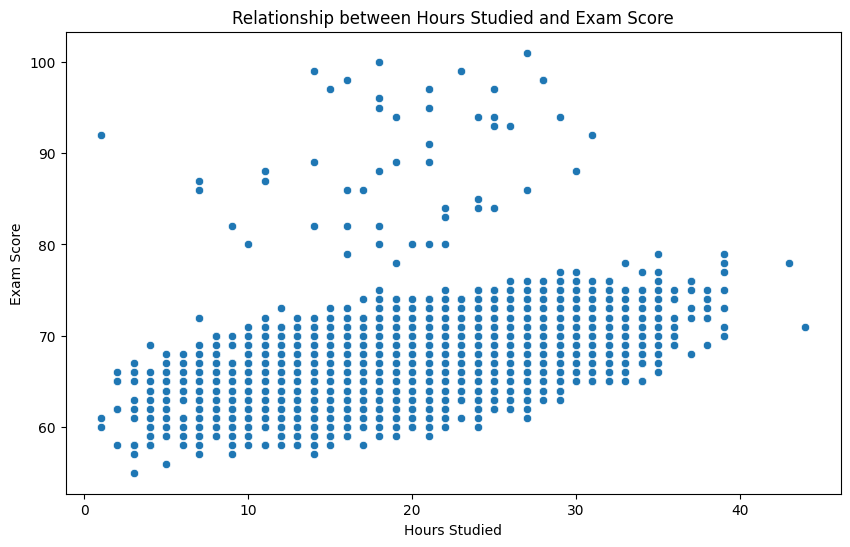

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=data)
plt.title('Relationship between Hours Studied and Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

Visualizing outliers in the 'Hours_Studied' column using a box plot.

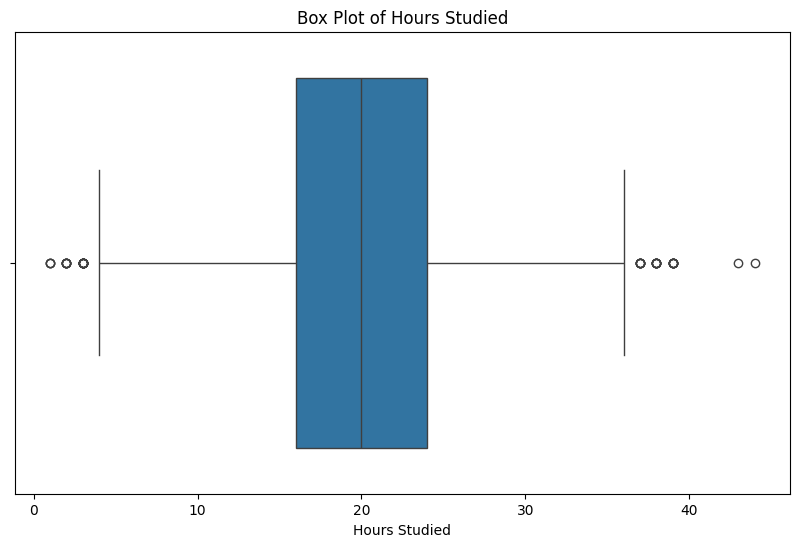

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Hours_Studied'])
plt.title('Box Plot of Hours Studied')
plt.xlabel('Hours Studied')
plt.show()

Removing outliers in the 'Hours_Studied' column using the IQR method.

In [9]:
Q1 = data['Hours_Studied'].quantile(0.25)
Q3 = data['Hours_Studied'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_no_outliers = data[(data['Hours_Studied'] >= lower_bound) & (data['Hours_Studied'] <= upper_bound)].copy()

print(f"Shape of data before removing outliers: {data.shape}")
print(f"Shape of data after removing outliers: {data_no_outliers.shape}")

# Update the data to the one without outliers
data = data_no_outliers

Shape of data before removing outliers: (6607, 20)
Shape of data after removing outliers: (6564, 20)


Visualizing outliers in the 'Hours_Studied' column after removing them.

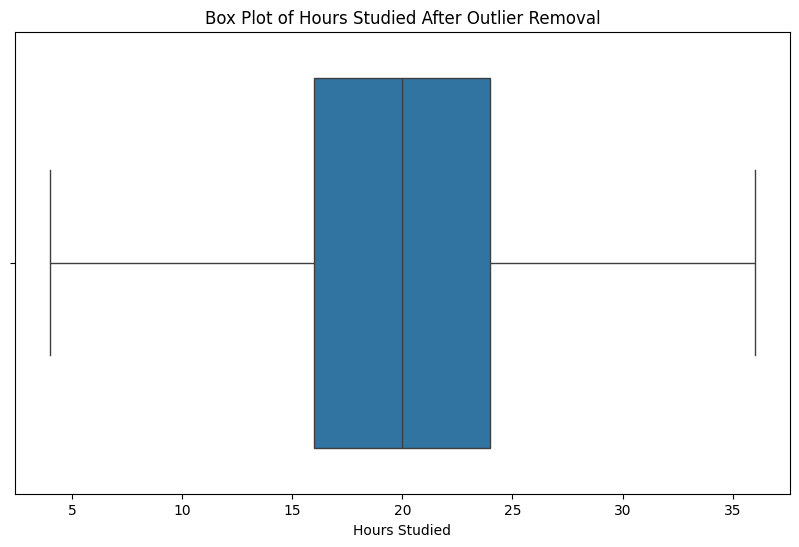

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Hours_Studied'])
plt.title('Box Plot of Hours Studied After Outlier Removal')
plt.xlabel('Hours Studied')
plt.show()

Visualizing the relationship between Hours_Studied and Exam_Score after removing outliers.

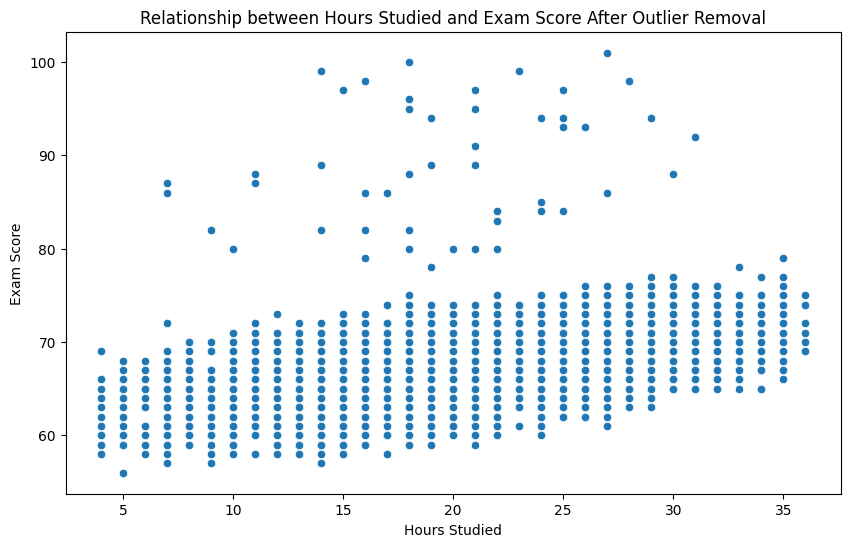

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=data)
plt.title('Relationship between Hours Studied and Exam Score After Outlier Removal')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

Visualizing outliers in the 'Hours_Studied' column using a violin plot.

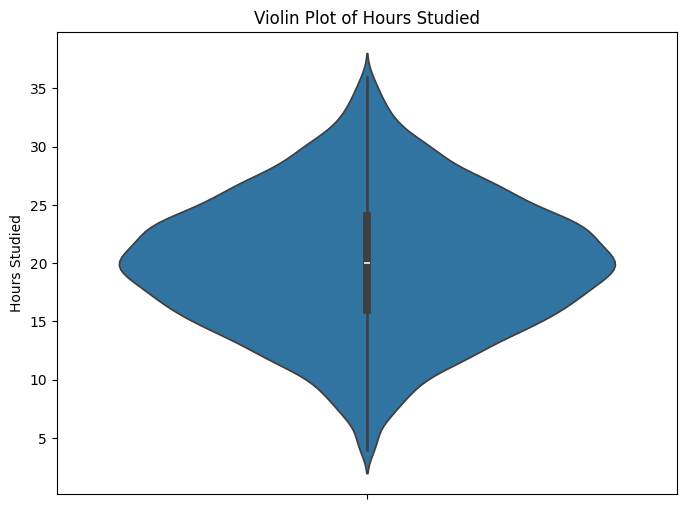

In [12]:
plt.figure(figsize=(8, 6))
sns.violinplot(y=data['Hours_Studied'])
plt.title('Violin Plot of Hours Studied')
plt.ylabel('Hours Studied')
plt.show()

#Split data

In [13]:
X=data_no_outliers['Hours_Studied']
y=data_no_outliers['Exam_Score']

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Train the model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr_model=LinearRegression()

In [17]:
lr_model.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

In [18]:
y_pred=lr_model.predict(X_test.values.reshape(-1,1))

#Evaluation

In [24]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Absolute Error: 2.4905172225832897
Mean Squared Error: 12.13686650629317


Visualizing the linear regression model and predictions.

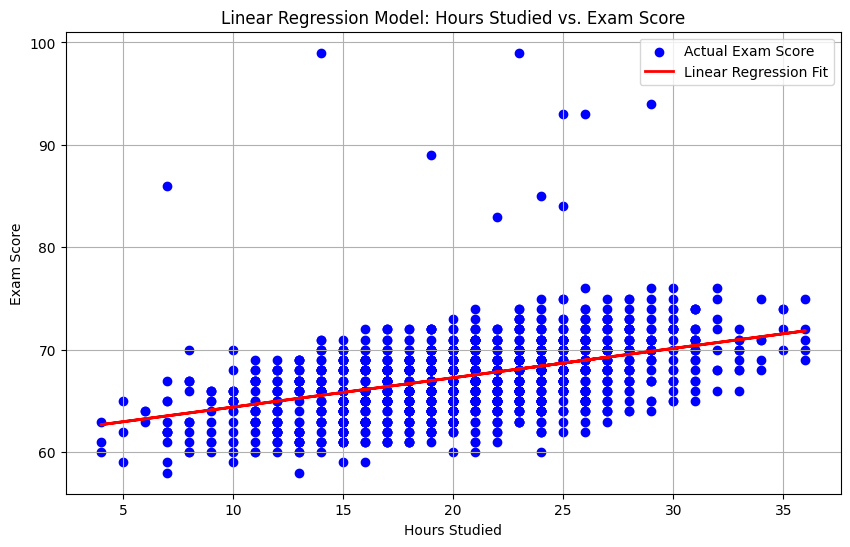

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Exam Score')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression Fit')
plt.title('Linear Regression Model: Hours Studied vs. Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.show()

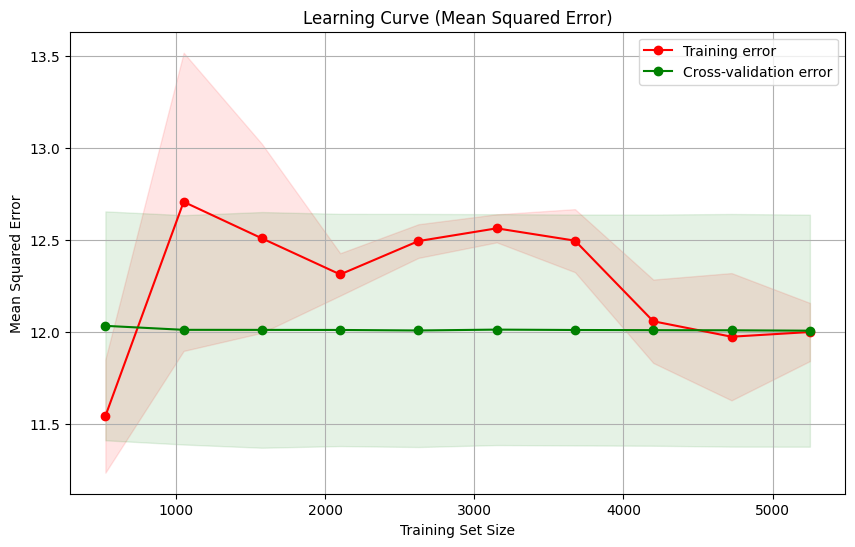

In [22]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming X and y are already defined and preprocessed
# If not, you'll need to define them based on your data

# Use the linear regression model
model = LinearRegression()

train_sizes, train_scores, test_scores = learning_curve(
    model, X.values.reshape(-1, 1), y, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Convert scores to positive MSE
train_mse = -train_scores
test_mse = -test_scores

# Calculate mean and standard deviation for plotting
train_mse_mean = np.mean(train_mse, axis=1)
train_mse_std = np.std(train_mse, axis=1)
test_mse_mean = np.mean(test_mse, axis=1)
test_mse_std = np.std(test_mse, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mse_mean, 'o-', color="r", label="Training error")
plt.plot(train_sizes, test_mse_mean, 'o-', color="g", label="Cross-validation error")
plt.fill_between(train_sizes, train_mse_mean - train_mse_std,
                 train_mse_mean + train_mse_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mse_mean - test_mse_std,
                 test_mse_mean + test_mse_std, alpha=0.1, color="g")

plt.title("Learning Curve (Mean Squared Error)")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.grid(True)
plt.show()

#Bonus:

#Try polynomial regression and compare performance

In [28]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features of degree 3
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(data[['Hours_Studied']])

Splitting the data with polynomial features into training and testing sets.

In [29]:
from sklearn.model_selection import train_test_split

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, data['Exam_Score'], test_size=0.2, random_state=42)

Training the Polynomial Regression model.

In [30]:
from sklearn.linear_model import LinearRegression

# Train the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)

LinearRegression()

Making predictions with the Polynomial Regression model.

In [31]:
y_pred_poly = poly_model.predict(X_test_poly)

Evaluating the Polynomial Regression model.

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error (Polynomial Regression):', mean_absolute_error(y_test_poly, y_pred_poly))
print('Mean Squared Error (Polynomial Regression):', mean_squared_error(y_test_poly, y_pred_poly))

Mean Absolute Error (Polynomial Regression): 2.490383833663635
Mean Squared Error (Polynomial Regression): 12.131981807899093


#Try experimenting with different feature combinations

> based on the correlation



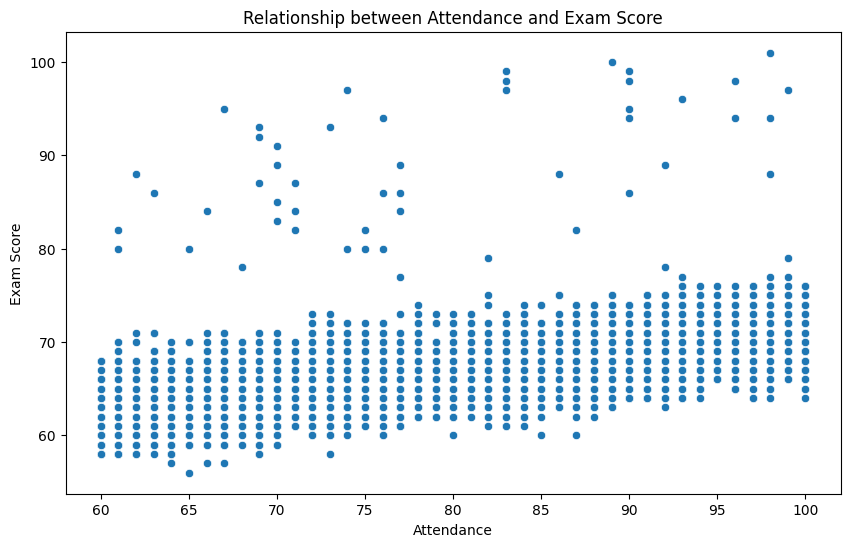

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Attendance', y='Exam_Score', data=data)
plt.title('Relationship between Attendance and Exam Score')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.show()

In [38]:
X_new=data_no_outliers[['Hours_Studied','Attendance']]
y=data_no_outliers['Exam_Score']

In [39]:
X_new_train,X_new_test,y_train,y_test=train_test_split(X_new,y,test_size=0.2,random_state=42)

In [40]:
lr_model.fit(X_new_train,y_train)

LinearRegression()

In [41]:
y_new_pred=lr_model.predict(X_new_test)

In [42]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_new_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_new_pred))

Mean Absolute Error: 1.5648152072666477
Mean Squared Error: 7.666438135629872


Training Mean Squared Error: 6.640345523386594
Test Mean Squared Error: 7.666438135629872


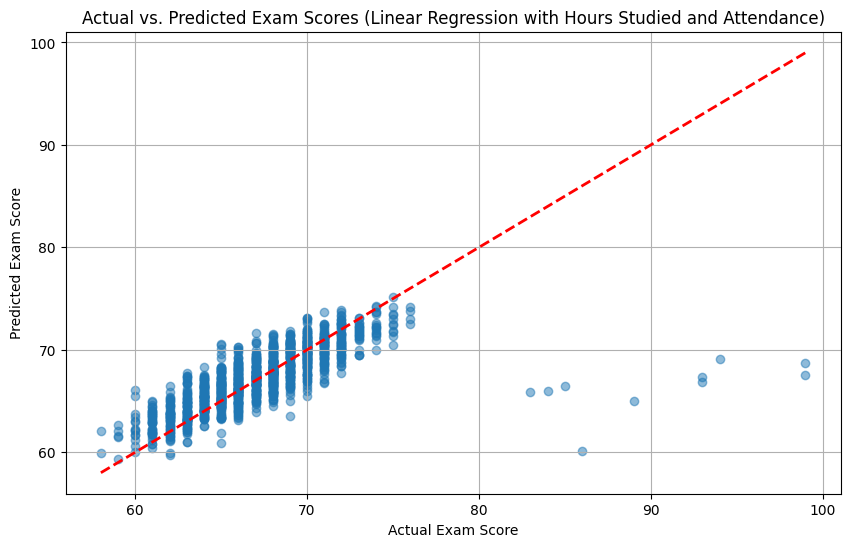

In [43]:
# Calculate MSE for training and test sets
y_train_pred_new = lr_model.predict(X_new_train)
train_mse_new = mean_squared_error(y_train, y_train_pred_new)
test_mse_new = mean_squared_error(y_test, y_new_pred)

print(f"Training Mean Squared Error: {train_mse_new}")
print(f"Test Mean Squared Error: {test_mse_new}")

# Since we don't have loss over epochs for Linear Regression,
# we can visualize the relationship between predicted and actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_new_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs. Predicted Exam Scores (Linear Regression with Hours Studied and Attendance)")
plt.grid(True)
plt.show()

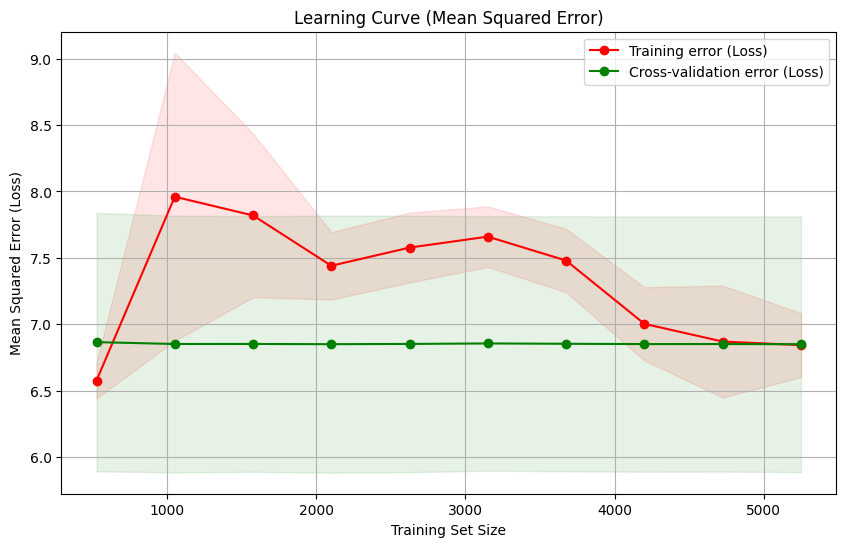

In [44]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_new and y are already defined and preprocessed
# Use the linear regression model with Hours_Studied and Attendance
model = LinearRegression()

train_sizes, train_scores, test_scores = learning_curve(
    model, X_new, y, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Convert scores to positive MSE (loss)
train_mse = -train_scores
test_mse = -test_scores

# Calculate mean and standard deviation for plotting
train_mse_mean = np.mean(train_mse, axis=1)
train_mse_std = np.std(train_mse, axis=1)
test_mse_mean = np.mean(test_mse, axis=1)
test_mse_std = np.std(test_mse, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mse_mean, 'o-', color="r", label="Training error (Loss)")
plt.plot(train_sizes, test_mse_mean, 'o-', color="g", label="Cross-validation error (Loss)")
plt.fill_between(train_sizes, train_mse_mean - train_mse_std,
                 train_mse_mean + train_mse_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mse_mean - test_mse_std,
                 test_mse_mean + test_mse_std, alpha=0.1, color="g")

plt.title("Learning Curve (Mean Squared Error)")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error (Loss)")
plt.legend(loc="best")
plt.grid(True)
plt.show()